# Plotting functionality

Here we will have a look at the different options for finetuning `pairplots` and `marginal_plots`.

Lets first draw some samples from the posterior used in a previous tutorial.


In [44]:
import torch
from toy_posterior_for_07_cc import ExamplePosterior

from sbi.analysis import pairplot

posterior = ExamplePosterior()
posterior_samples = posterior.sample((100,))

We will start with the default plot and gradually make it prettier

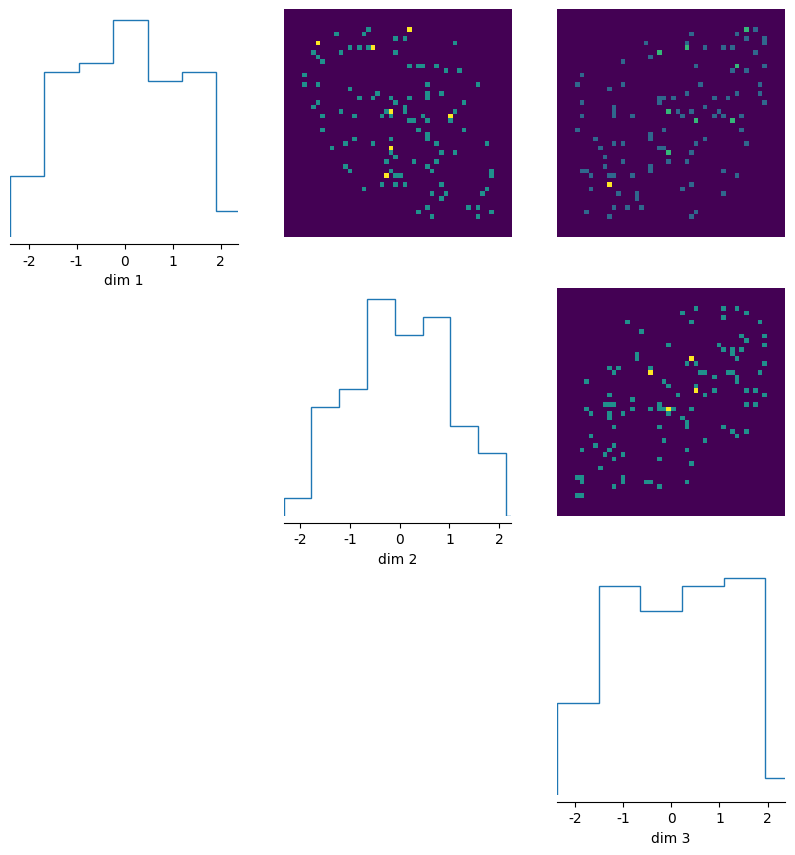

In [45]:
_ = pairplot(
    posterior_samples,
)

## Customisation

The pairplots are split into three regions, the diagonal (`diag`) and the upper and lower off-diagonal regions(`upper` and `lower`). We can pass separate arguments (e.g. `hist`, `kde`, `scatter`) for each region, as well as corresponding style keywords in a dictionary (by using e.g. `upper_kwargs`). For overall figure stylisation one can use `fig_kwargs`.

To get a closer look at the potential options, have a look at the following dataclasses.
* `FigOptions` dataclass for figure stylisation.
* `ContourOffDiagOptions`,`HistOffDiagOptions`, `KdeOffDiagOptions`, `PlotOffDiagOptions`, `ScatterOffDiagOptions` dataclasses for styling the upper and lower off-diagonal regions.
* `HistDiagOptions`, `KdeDiagOptions`, `ScatterDiagOptions` for styling the diagonal region. 

You can find the dataclasses in [analysis/plotting_classes.py](https://github.com/sbi-dev/sbi/blob/961-pairplot/sbi/analysis/plotting_classes.py).

As illustrated below, we can directly use any `matplotlib` keywords (such as `cmap` for images) by passing them in the `mpl_kwargs` entry of `upper_kwargs` or `diag_kwargs`.

### Migration Note
Previously you would pass nested dictionaries to `diag_kwargs`, `upper_kwargs`, `lower_kwargs`, and `fig_kwargs` arguments. This is still supported for backward compatability, but we recommend using the dataclasses listed above for clarity and autocompletion.

Let's now make a scatter plot for the upper diagonal, a histogram for the diagonal, and pass the respective dataclasses for both.

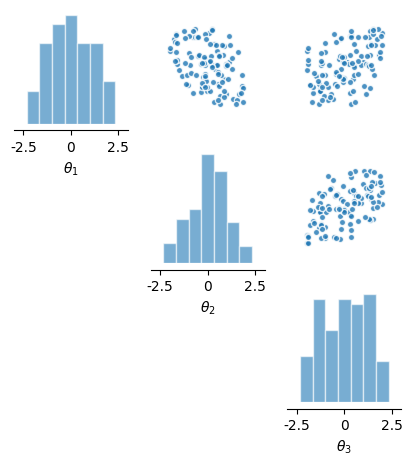

In [ ]:
from sbi.analysis.plotting_classes import HistDiagOptions, ScatterOffDiagOptions

_ = pairplot(
    posterior_samples,
    limits=[[-3, 3] * 3],
    figsize=(5, 5),
    diag="hist",
    upper="scatter",
    diag_kwargs=HistDiagOptions(
        mpl_kwargs={
            "color": 'tab:blue',
            "histtype": "bar",
            "bins": 10,
            "edgecolor": 'white',
            "linewidth": 1,
            "alpha": 0.6,
            "fill": True,
        }
    ),
    upper_kwargs=ScatterOffDiagOptions(mpl_kwargs={"color": 'tab:blue', "s": 20, "alpha": 0.8}),
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"],
)

### Compare two sets of samples

By passing a list of samples, we can plot two sets of samples on top of each other.

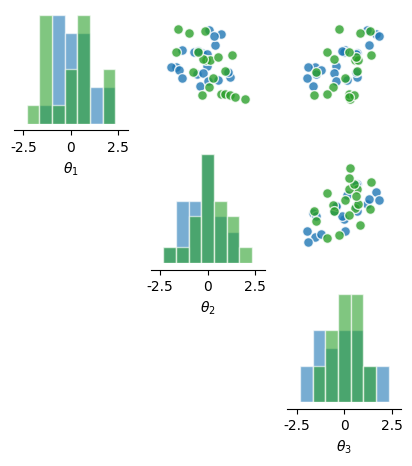

In [47]:
# draw two different subsets of samples to plot
posterior_samples1 = posterior.sample((20,))
posterior_samples2 = posterior.sample((20,))

_ = pairplot(
    [posterior_samples1, posterior_samples2],
    limits=[[-3, 3] * 3],
    figsize=(5, 5),
    diag=["hist", "hist"],
    upper=["scatter", "scatter"],
    diag_kwargs=HistDiagOptions(
        mpl_kwargs={
            "bins": 10,
            "edgecolor": 'white',
            "linewidth": 1,
            "alpha": 0.6,
            "histtype": "bar",
            "fill": True,
        }
    ),
    upper_kwargs=ScatterOffDiagOptions(mpl_kwargs={"s": 50, "alpha": 0.8}),
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"],
)

### Multi-layered plots

We can use the same functionality to make a multi-layered plot using the same set of samples, e.g. a kernel-density estimate on top of a scatter plot.

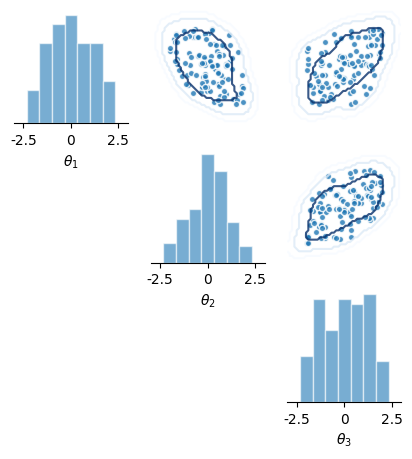

In [48]:
from sbi.analysis.plotting_classes import FigOptions

_ = pairplot(
    [posterior_samples, posterior_samples],
    limits=[[-3, 3] * 3],
    figsize=(5, 5),
    diag=["hist", None],
    upper=["scatter", "contour"],
    diag_kwargs=HistDiagOptions(
        mpl_kwargs= {
            "bins": 10,
            "color": 'tab:blue',
            "edgecolor": 'white',
            "linewidth": 1,
            "alpha": 0.6,
            "histtype": "bar",
            "fill": True,
        },
    ),
    upper_kwargs=[
        ScatterOffDiagOptions(
            mpl_kwargs={"color": 'tab:blue', "s": 20, "alpha": 0.8},
        ),
        ScatterOffDiagOptions(mpl_kwargs={"cmap": 'Blues_r', "alpha": 0.8, "colors": None}),
    ],
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"],
    fig_kwargs=FigOptions(despine=dict(offset=0)),
)

### Lower diagonal

We can add something in the lower off-diagonal as well.

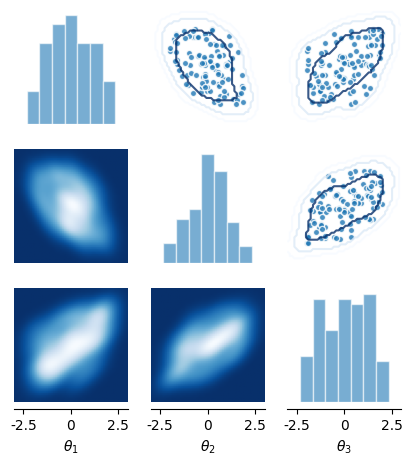

In [49]:
from sbi.analysis.plotting_classes import KdeOffDiagOptions

_ = pairplot(
    [posterior_samples, posterior_samples],
    limits=[[-3, 3] * 3],
    figsize=(5, 5),
    diag=["hist", None],
    upper=["scatter", "contour"],
    lower=["kde", None],
    diag_kwargs=HistDiagOptions(
        mpl_kwargs={
            "bins": 10,
            "color": 'tab:blue',
            "edgecolor": 'white',
            "linewidth": 1,
            "alpha": 0.6,
            "histtype": "bar",
            "fill": True,
        }
    ),
    upper_kwargs=[
        ScatterOffDiagOptions(mpl_kwargs={"color": 'tab:blue', "s": 20, "alpha": 0.8}),
        ScatterOffDiagOptions(mpl_kwargs={"cmap": 'Blues_r', "alpha": 0.8, "colors": None}),
    ],
    lower_kwargs=KdeOffDiagOptions(mpl_kwargs={"cmap": "Blues_r"}),
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"],
)

### Adding observed data

We can also add points, e.g., our observed data $\theta_o$ to the plot.

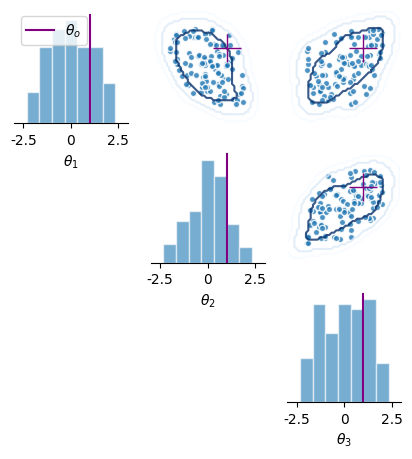

In [50]:
# fake observed data:

theta_o = torch.ones(1, 3)

_ = pairplot(
    [posterior_samples, posterior_samples],
    limits=[[-3, 3] * 3],
    figsize=(5, 5),
    diag=["hist", None],
    upper=["scatter", "contour"],
    diag_kwargs=HistDiagOptions(
        mpl_kwargs={
            "bins": 10,
            "color": 'tab:blue',
            "edgecolor": 'white',
            "linewidth": 1,
            "alpha": 0.6,
            "histtype": "bar",
            "fill": True,
        }
    ),
    upper_kwargs=[
        ScatterOffDiagOptions(mpl_kwargs={"color": 'tab:blue', "s": 20, "alpha": 0.8}),
        ScatterOffDiagOptions(mpl_kwargs={"cmap": 'Blues_r', "alpha": 0.8, "colors": None}),
    ],
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"],
    points=theta_o,
    fig_kwargs=FigOptions(
        points_labels=[r"$\theta_o$"],
        legend=True,
        points_colors=["purple"],
        points_offdiag=dict(marker="+", markersize=20),
        despine=dict(offset=0),
    ),
)

### Subsetting the plot

For high-dimensional posteriors, we might only want to visualise a subset of the marginals. This can be done by passing a list of entries to plot to the `subset` argument of the `pairplot` function.

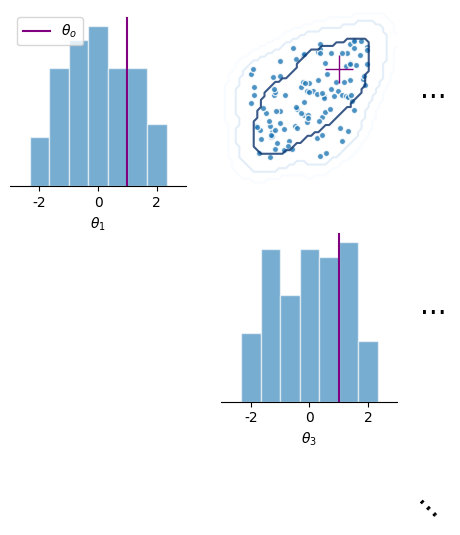

In [51]:
_ = pairplot(
    [posterior_samples, posterior_samples],
    limits=[[-3, 3] * 3],
    figsize=(5, 5),
    subset=[0, 2],
    diag=["hist", None],
    upper=["scatter", "contour"],
    diag_kwargs=HistDiagOptions(
        mpl_kwargs={
            "bins": 10,
            "color": 'tab:blue',
            "edgecolor": 'white',
            "linewidth": 1,
            "alpha": 0.6,
            "histtype": "bar",
            "fill": True,
        }
    ),
    upper_kwargs=[
        ScatterOffDiagOptions(mpl_kwargs={"color": 'tab:blue', "s": 20, "alpha": 0.8}),
        ScatterOffDiagOptions(mpl_kwargs={"cmap": 'Blues_r', "alpha": 0.8, "colors": None}),
    ],
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"],
    points=theta_o,
    fig_kwargs=FigOptions(
        points_labels=[r"$\theta_o$"],
        legend=True,
        points_colors=["purple"],
        points_offdiag=dict(marker="+", markersize=20),
        despine=dict(offset=0),
    ),
)

### Plot just the marginals

1D Marginals can also be visualised using the `marginal_plot` function

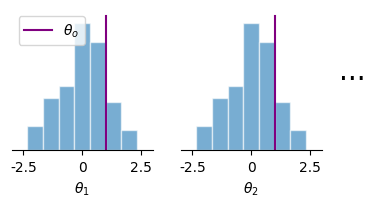

In [52]:
from sbi.analysis import marginal_plot

# plot posterior samples
_ = marginal_plot(
    [posterior_samples, posterior_samples],
    limits=[[-3, 3] * 3],
    subset=[0, 1],
    diag=["hist", None],
    diag_kwargs=HistDiagOptions(
        mpl_kwargs={
            "bins": 10,
            "color": 'tab:blue',
            "edgecolor": 'white',
            "linewidth": 1,
            "alpha": 0.6,
            "histtype": "bar",
            "fill": True,
        }
    ),
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"],
    points=[torch.ones(1, 3)],
    figsize=(4, 2),
    fig_kwargs=FigOptions(
        points_labels=[r"$\theta_o$"],
        legend=True,
        points_colors=["purple"],
        points_offdiag=dict(marker="+", markersize=20),
        despine=dict(offset=0),
    ),
)